In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

**Exploratory Data Analysis (EDA):**

In [2]:
# loading the data
employee_att_perform = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
employee_att_perform.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
employee_att_perform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
employee_att_perform.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Distribution of attrition across different demographic and job-related variables**

In [5]:
# Attrition : Yes -> left the compagny
#             No  -> stayed

1. Distribution of attriction per age

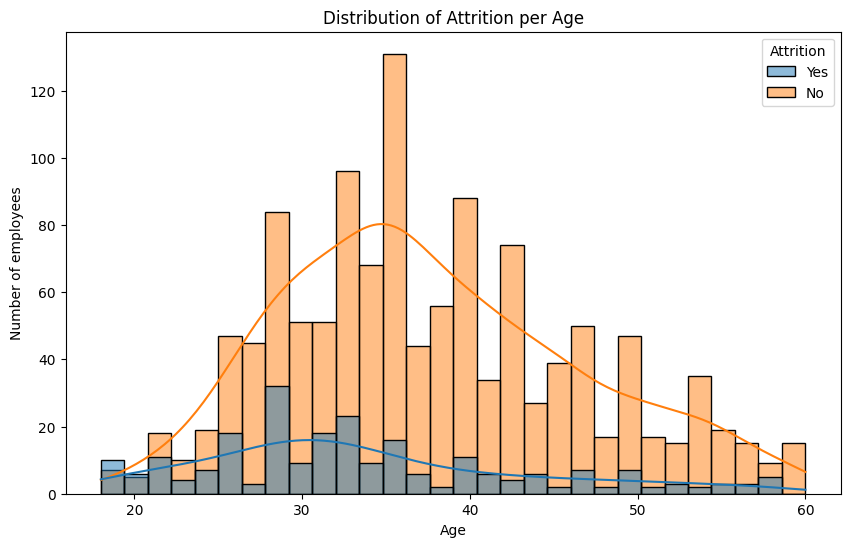

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=employee_att_perform, x='Age', hue='Attrition', bins=30, kde=True)
plt.title('Distribution of Attrition per Age')
plt.xlabel('Age')
plt.ylabel('Number of employees')
plt.show()

2. Distribution of attrition per gender

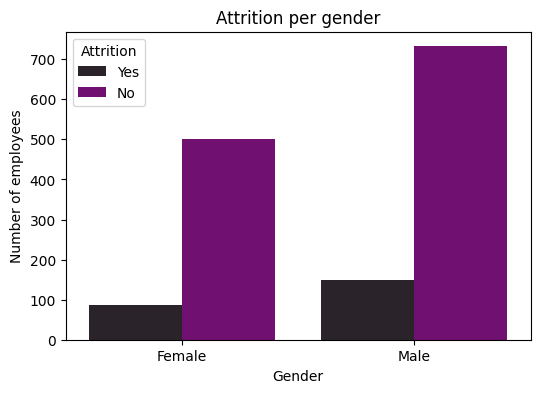

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data=employee_att_perform, x="Gender", hue="Attrition", palette="dark:purple")
plt.title("Attrition per gender")
plt.xlabel("Gender")
plt.ylabel("Number of employees")

plt.show()

3. Distribution of attrition per education

In [8]:
employee_att_perform['Education'].unique()

array([2, 1, 4, 3, 5])

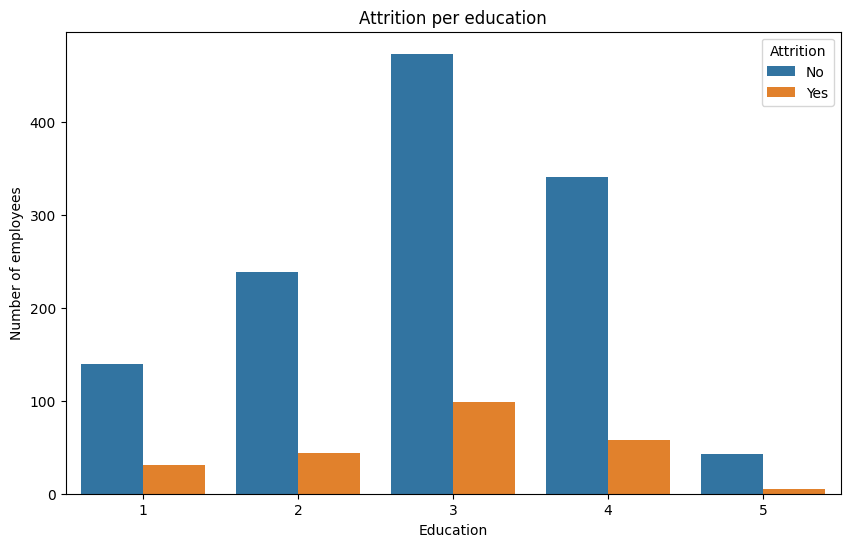

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=employee_att_perform, x="Education", hue="Attrition")
plt.title("Attrition per education")
plt.xlabel("Education")
plt.ylabel("Number of employees")

plt.show()

4. Distribution of attrition per job role

In [10]:
employee_att_perform['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

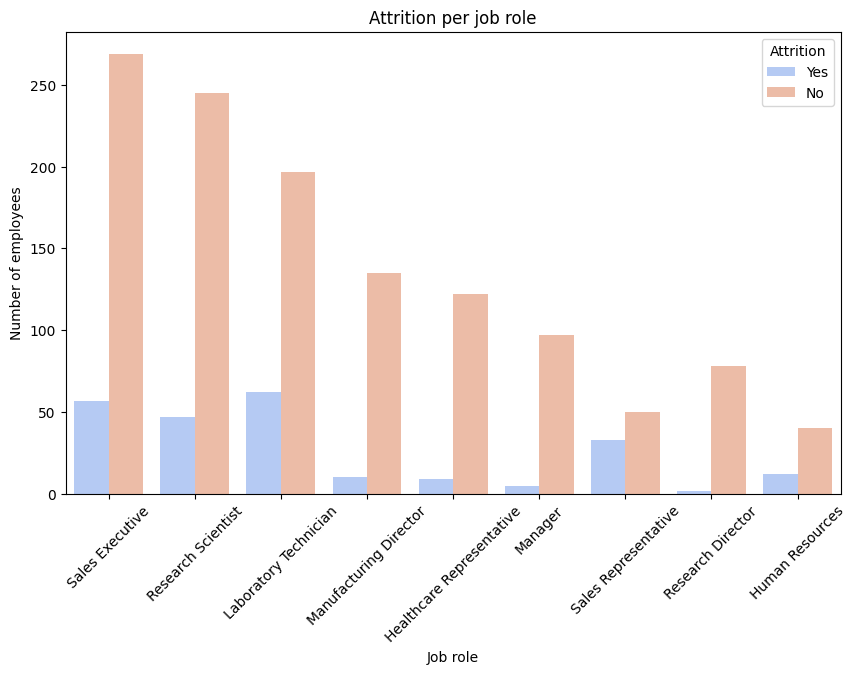

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=employee_att_perform, x="JobRole", hue="Attrition", order=employee_att_perform["JobRole"].value_counts().index, palette="coolwarm")
plt.title("Attrition per job role")
plt.xlabel("Job role")
plt.xticks(rotation=45)
plt.ylabel("Number of employees")

plt.show()

5. Distribution of attrition per department

In [12]:
employee_att_perform['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

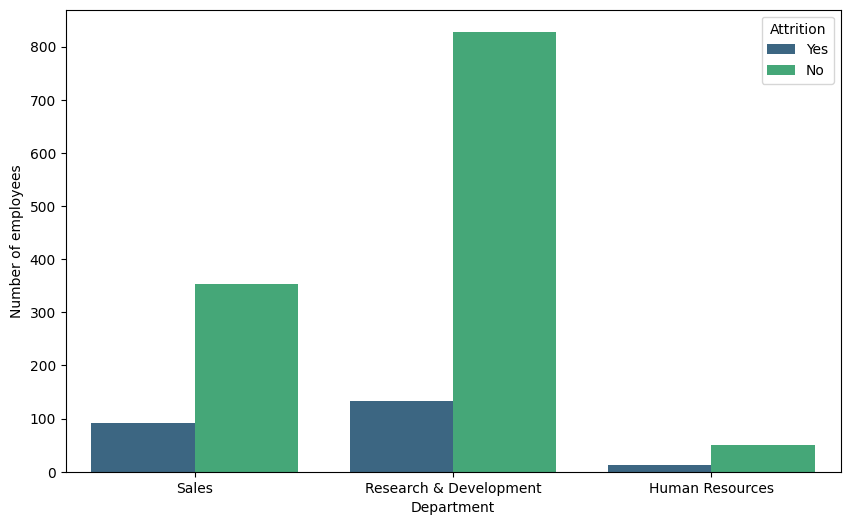

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=employee_att_perform, x="Department", hue="Attrition", palette="viridis" )
plt.xlabel("Department")
plt.ylabel("Number of employees")

plt.show()

Satisfaction and work-life

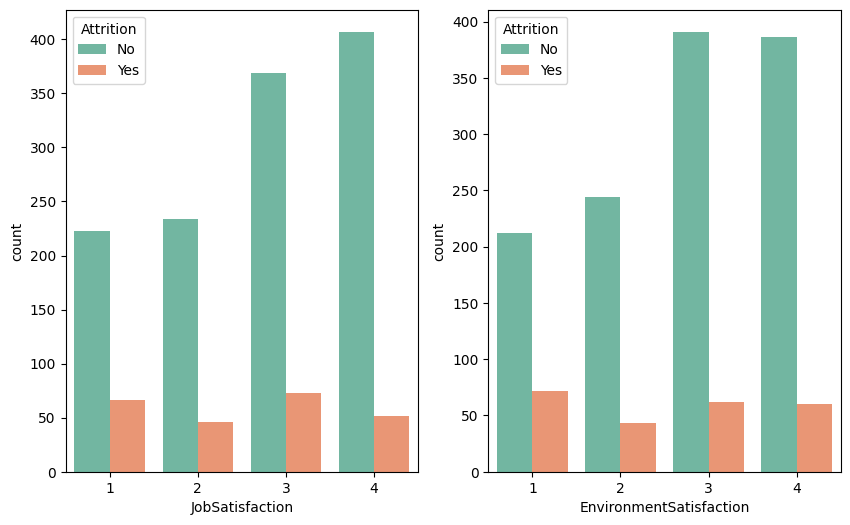

In [14]:
satisfaction_vars = ["JobSatisfaction", "EnvironmentSatisfaction"]

plt.figure(figsize=(10, 6))
for i, var in enumerate(satisfaction_vars):
    plt.subplot(1, 2, i+1)
    sns.countplot(data=employee_att_perform, x=var, hue="Attrition", palette="Set2")
    plt

**Data Preprocessing:**

1. Missing values

In [15]:
# Verify is there are some missing values
employee_att_perform.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


There are **no missing values** in the dataset. It is cleaned for analysis.

2. Encoding categorical variables

In [16]:
df_employee_att_perform = employee_att_perform.copy()

df_employee_att_perform.nunique()
# Column that contains a small number of unique values,
# chance are it is categorical

,0
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In [17]:
le = LabelEncoder()

# Ordinal variables
categorical_columns = ["MaritalStatus", "OverTime", "Gender"]

for col in categorical_columns:
    df_employee_att_perform[col] = le.fit_transform(df_employee_att_perform[col])
    print(f"{col} classes:", le.classes_)

print(df_employee_att_perform[["MaritalStatus", "OverTime", "Gender"]].head())

# One-Hot Encoding nominal variables
df_employee_att_perform = pd.get_dummies(df_employee_att_perform, columns=["JobRole"], drop_first=True)


MaritalStatus classes: ['Divorced' 'Married' 'Single']
OverTime classes: ['No' 'Yes']
Gender classes: ['Female' 'Male']
   MaritalStatus  OverTime  Gender
0              2         1       0
1              1         0       1
2              2         1       1
3              1         1       0
4              1         0       1


In [18]:
# Verifications
print(df_employee_att_perform[["MaritalStatus", "OverTime", "Gender"]].head())
print("Columns after One-Hot Encoding:", df_employee_att_perform.columns[df_employee_att_perform.columns.str.startswith("JobRole_")].tolist())


   MaritalStatus  OverTime  Gender
0              2         1       0
1              1         0       1
2              2         1       1
3              1         1       0
4              1         0       1
Columns after One-Hot Encoding: ['JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative']


3. Normalization and standardization

In [19]:
scaler = MinMaxScaler()
df_employee_att_perform[["MonthlyIncome", "Age", "DistanceFromHome"]] = scaler.fit_transform(df_employee_att_perform[["MonthlyIncome", "Age", "DistanceFromHome"]])

In [20]:
scaler = StandardScaler()
df_employee_att_perform[["MonthlyIncome", "Age", "DistanceFromHome"]] = scaler.fit_transform(df_employee_att_perform[["MonthlyIncome", "Age", "DistanceFromHome"]])